In [1]:
!pip install pandas
!pip install scikit-learn
!pip install gensim
!pip install numpy
!pip install matplotlib

In [2]:
# All the essential imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import gensim.downloader as api
from gensim.models.keyedvectors import KeyedVectors

In [3]:
# Set display options for pandas to avoid scientific notation
pd.set_option('display.float_format', lambda x: f'{int(x)}' if x == int(x) else f'{x:.0f}')

In [4]:
tweet_df_1 = pd.read_csv('/content/drive/MyDrive/Social Network Analysis & GNN/Traditional_ML/downloaded_tweets_extend_nolf2.tsv', sep='\t')
tweet_df_2 = pd.read_csv('/content/drive/MyDrive/Social Network Analysis & GNN/Traditional_ML/downloaded_tweets_extend_original_nolf2.tsv', sep='\t' )

In [5]:
tweet_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63039 entries, 0 to 63038
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   63039 non-null  object 
 1   author               63039 non-null  object 
 2   date                 63038 non-null  object 
 3   hashtags             42392 non-null  object 
 4   referenced           58141 non-null  object 
 5   in_reply_to_user_id  6307 non-null   float64
 6   public_metrics       0 non-null      float64
 7   text_nolf            63031 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.8+ MB


In [6]:
tweet_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43530 entries, 0 to 43529
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43528 non-null  object 
 1   author               43526 non-null  float64
 2   date                 43526 non-null  object 
 3   hashtags             43522 non-null  object 
 4   referenced           9457 non-null   object 
 5   in_reply_to_user_id  4787 non-null   float64
 6   public_metrics       0 non-null      float64
 7   text_nolf            20459 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.7+ MB


In [7]:
#merging both the dataframe horizontally
merged_tweets = pd.concat([tweet_df_1, tweet_df_2], ignore_index=True).drop(columns=['public_metrics'])
merged_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106569 entries, 0 to 106568
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106567 non-null  object 
 1   author               106565 non-null  object 
 2   date                 106564 non-null  object 
 3   hashtags             85914 non-null   object 
 4   referenced           67598 non-null   object 
 5   in_reply_to_user_id  11094 non-null   float64
 6   text_nolf            83490 non-null   object 
dtypes: float64(1), object(6)
memory usage: 5.7+ MB


In [8]:
# Test whether merging was successful
len(merged_tweets) == len(tweet_df_1) + len(tweet_df_2)

True

In [9]:
cleaned_df = merged_tweets.dropna(subset=['in_reply_to_user_id', 'referenced'])
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10877 entries, 3 to 106554
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10877 non-null  object 
 1   author               10877 non-null  object 
 2   date                 10877 non-null  object 
 3   hashtags             10868 non-null  object 
 4   referenced           10877 non-null  object 
 5   in_reply_to_user_id  10877 non-null  float64
 6   text_nolf            8546 non-null   object 
dtypes: float64(1), object(6)
memory usage: 679.8+ KB


In [10]:
print(f"Original number of rows: {len(merged_tweets)}")
print(f"Number of rows after cleaning: {len(cleaned_df)}")

Original number of rows: 106569
Number of rows after cleaning: 10877


In [11]:
cleaned_df['referenced']

,referenced
3,[<ReferencedTweet id=1520168270283915264 type=...
17,[<ReferencedTweet id=1518605836607799296 type=...
39,[<ReferencedTweet id=1516610006992535552 type=...
41,[<ReferencedTweet id=1516408716442038272 type=...
76,[<ReferencedTweet id=1514332714379403283 type=...
...,...
106486,[<ReferencedTweet id=1520369856071184384 type=...
106515,[<ReferencedTweet id=1520450288095797251 type=...
106516,[<ReferencedTweet id=1520452082632900610 type=...
106553,[<ReferencedTweet id=683694522941964289 type=r...


In [12]:
# Define a function to extract the type from the 'referenced' column
def extract_type(referenced):
    if pd.isnull(referenced):
        return None  # Handle missing values
    elif "type=retweeted" in referenced:
        return "retweeted"
    elif "type=replied_to" in referenced:
        return "replied_to"
    elif "type=quoted" in referenced:
        return "quoted"
    return None  # Default for unexpected cases

# Apply the function to create a 'type' column
cleaned_df['type'] = cleaned_df['referenced'].apply(extract_type)

# Split the dataset into categories
retweeted_df = cleaned_df[cleaned_df['type'] == 'retweeted']
replied_to_df = cleaned_df[cleaned_df['type'] == 'replied_to']
quoted_df = cleaned_df[cleaned_df['type'] == 'quoted']

# Output the results
print("Original DataFrame:")
print(len(cleaned_df))
print("\nRetweeted Tweets:")
print(len(retweeted_df))
print("\nReplied-to Tweets:")
print(len(replied_to_df))
print("\nQuoted Tweets:")
print(len(quoted_df))

Original DataFrame:
10877

Retweeted Tweets:
0

Replied-to Tweets:
10210

Quoted Tweets:
667


<ipython-input-12-618457a8e214>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['type'] = cleaned_df['referenced'].apply(extract_type)


Hence we realize that tweets with retweet has no in_reply_to_user_id to user id, so all the null in_reply_to_user_id got removed from dataset. For SNN we need both user B (author) and user A (person who quoted or replied_to)

In [13]:
len(cleaned_df) == len(retweeted_df) + len(replied_to_df) + len(quoted_df)

True

In [14]:
replied_to_path = '/content/drive/MyDrive/Social Network Analysis & GNN/Traditional_ML/replied_to_tweets.csv'
quoted_path = '/content/drive/MyDrive/Social Network Analysis & GNN/Traditional_ML/quoted_tweets.csv'

replied_to_df.to_csv(replied_to_path, index=False)
quoted_df.to_csv(quoted_path, index=False)

In [15]:
# categorize author into high influence and low influence
# Authors with that recieved replies & quotes from more than 10 unique users will be considered as high influence
influence_counts = cleaned_df.groupby('author')['in_reply_to_user_id'].nunique()
influence_counts

,in_reply_to_user_id
author,
1688,3
673983,1
785406,1
813286,1
1652541,1
...,...
950215424981028864,7
967871677399994368,23
977710998,11


In [16]:
influence_threshold = 3
influence_counts = influence_counts.reset_index()
influence_counts['influence_category'] = influence_counts['in_reply_to_user_id'].apply(
    lambda x: 'high influence' if x > influence_threshold else 'low influence'
)
# change in_reply_to_user_id to user user count
influence_counts = influence_counts.rename(columns={'in_reply_to_user_id': 'users_replied_quoted'})

In [17]:
influence_counts

,author,users_replied_quoted,influence_category
0,1688,3,low influence
1,673983,1,low influence
2,785406,1,low influence
3,813286,1,low influence
4,1652541,1,low influence
...,...,...,...
2600,950215424981028864,7,high influence
2601,967871677399994368,23,high influence
2602,977710998,11,high influence
2603,981436419087523840,53,high influence


We have 2605 users in the dataset, who posted a tweet on twitter

In [18]:
#Influence count of each author of the tweet
influence_counts.sort_values(by='users_replied_quoted', ascending=False)


,author,users_replied_quoted,influence_category
2564,199452338,971,high influence
2587,578601744,505,high influence
2592,804582780298412032,409,high influence
2572,302984766,394,high influence
2549,1387010761994682371,300,high influence
...,...,...,...
926,488950348,1,low influence
927,489693172,1,low influence
928,493606253,1,low influence
929,494701047,1,low influence


In [19]:
# number of high influence users
high_infl_users_count = len(influence_counts[influence_counts['influence_category'] == 'high influence'])
high_infl_users_count

111

In [20]:
# number of low influence users
low_infl_users_count = len(influence_counts[influence_counts['influence_category'] == 'low influence'])
low_infl_users_count

2494

In [21]:
len(influence_counts) == low_infl_users_count + high_infl_users_count

True

In [22]:
# Merge back with the original dataset if needed
cleaned_df_infl_label = pd.merge(
    cleaned_df,
    influence_counts[['author', 'influence_category']],
    on='author',
    how='inner'
)

In [23]:
len(cleaned_df_infl_label)

10877

In [24]:
cleaned_df_infl_label.drop_duplicates()

,id,author,date,hashtags,referenced,in_reply_to_user_id,text_nolf,type,influence_category
0,1520168272896962562,308045021,2022-04-29 22:28:54+00:00,"LC,exercise",[<ReferencedTweet id=1520168270283915264 type=...,308045021,Workouts &amp; ample sleep. Sigh….this is grea...,replied_to,high influence
1,1518605841624190976,308045021,2022-04-25 15:00:21+00:00,"TakingABreak,exercise",[<ReferencedTweet id=1518605836607799296 type=...,308045021,Or will this be me by the end of the week? We’...,replied_to,high influence
2,1516610008082960389,308045021,2022-04-20 02:49:37+00:00,authenticChineseFood,[<ReferencedTweet id=1516610006992535552 type=...,308045021,"Over cooked. As U can see from my picture, the...",replied_to,high influence
3,1516601473219629056,308045021,2022-04-20 02:15:42+00:00,MyBigFatGreekWedding,[<ReferencedTweet id=1516408716442038272 type=...,42052422,@NiaVardalos You Persevered ..! #MyBigFatGreek...,replied_to,high influence
4,1514433241545121793,308045021,2022-04-14 02:39:56+00:00,msm,[<ReferencedTweet id=1514332714379403283 type=...,16129920,"@maddow Texas local news, why aren’t u coverin...",quoted,high influence
...,...,...,...,...,...,...,...,...,...
10872,1520408831880179713,958685436112658432,2022-04-30 14:24:48+00:00,Albo4PM,[<ReferencedTweet id=1520369856071184384 type=...,1238370241169616896,NaN,replied_to,low influence
10873,1520451336176902150,1170480176,2022-04-30 17:13:41+00:00,"DOG,ScienceResearch",[<ReferencedTweet id=1520450288095797251 type=...,1170480176,NaN,replied_to,low influence
10874,1520454449583509505,791638976,2022-04-30 17:26:04+00:00,NeverVoteCon,[<ReferencedTweet id=1520452082632900610 type=...,25575859,NaN,replied_to,low influence
10875,683703028621377537,93193090,2016-01-03 17:34:39+00:00,"ISIS,Ukraine,DonbRRRRRR,Donetsk,novorossia",[<ReferencedTweet id=683694522941964289 type=r...,93193090,NaN,replied_to,low influence


In [25]:
cleaned_df_infl_label.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10877 non-null  object 
 1   author               10877 non-null  object 
 2   date                 10877 non-null  object 
 3   hashtags             10868 non-null  object 
 4   referenced           10877 non-null  object 
 5   in_reply_to_user_id  10877 non-null  float64
 6   text_nolf            8546 non-null   object 
 7   type                 10877 non-null  object 
 8   influence_category   10877 non-null  object 
dtypes: float64(1), object(8)
memory usage: 764.9+ KB


In [26]:
# Number of high infl
len(cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == 'high influence'])

6763

In [27]:
# Number of low infl
len(cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == 'low influence'])

4114

After merging the influence label to actual dataset, the number of high and low influence users remain the same.

In [28]:
#group by author based on influence category
cleaned_df_infl_label.groupby('influence_category')['author'].nunique()

,author
influence_category,
high influence,111
low influence,2494


In [29]:
tweet_dataset_classification_path = '/content/drive/MyDrive/Social Network Analysis & GNN/Traditional_ML/tweet_dataset_classification.csv'
cleaned_df_infl_label.to_csv(tweet_dataset_classification_path, index=False)

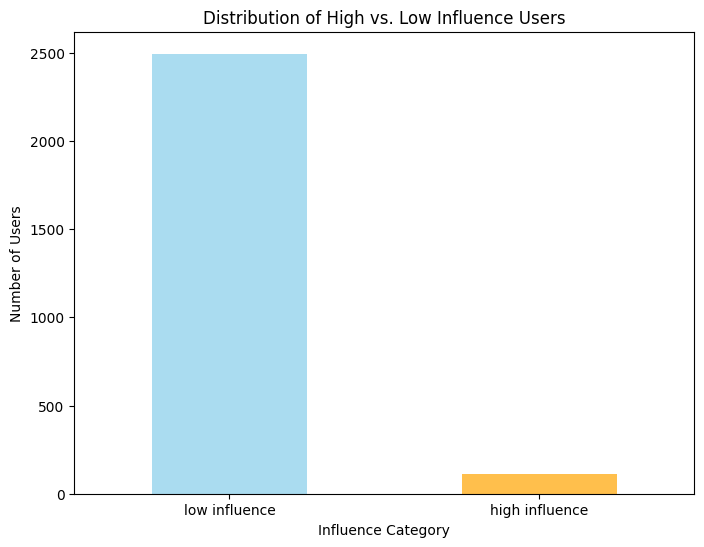

In [30]:
# Count the number of high and low influence users
influence_category_counts = influence_counts['influence_category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
influence_category_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.7)
plt.title('Distribution of High vs. Low Influence Users')
plt.xlabel('Influence Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

In [31]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


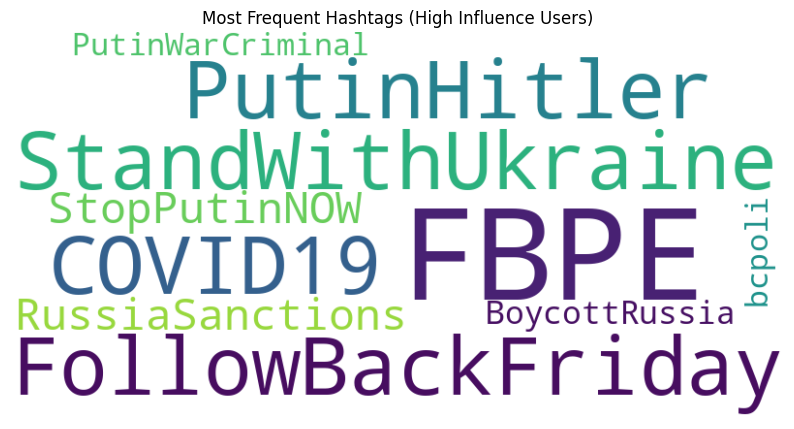

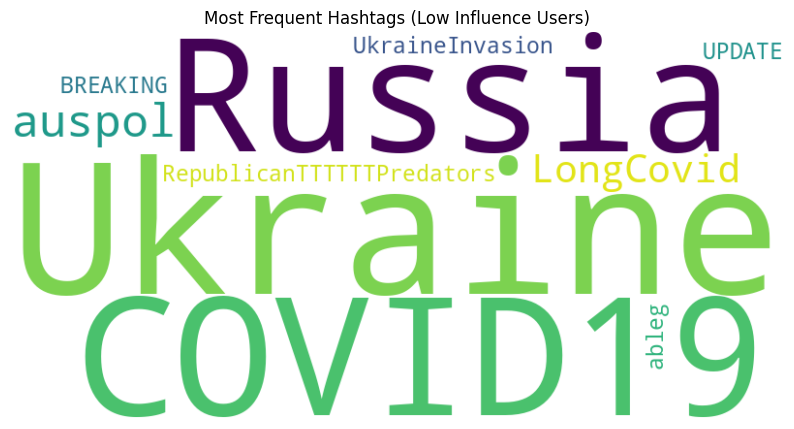

In [32]:
from collections import Counter
from wordcloud import WordCloud

# Split dataset by influence category
high_influence_df = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == 'high influence']
low_influence_df = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == 'low influence']

# Function to extract hashtags
def get_top_hashtags(data, n=10):
    all_hashtags = data['hashtags'].dropna().str.strip("[]").str.replace("'", "").str.split(',').explode()
    return Counter(all_hashtags).most_common(n)

high_influence_hashtags = get_top_hashtags(high_influence_df)
low_influence_hashtags = get_top_hashtags(low_influence_df)

# Create WordCloud for high influence users
high_influence_text = ' '.join([tag for tag, _ in high_influence_hashtags])
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_influence_text)
plt.figure(figsize=(10, 6))
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Hashtags (High Influence Users)')
plt.show()

# Create WordCloud for high influence users
high_influence_text = ' '.join([tag for tag, _ in low_influence_hashtags])
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_influence_text)
plt.figure(figsize=(10, 6))
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Hashtags (Low Influence Users)')
plt.show()


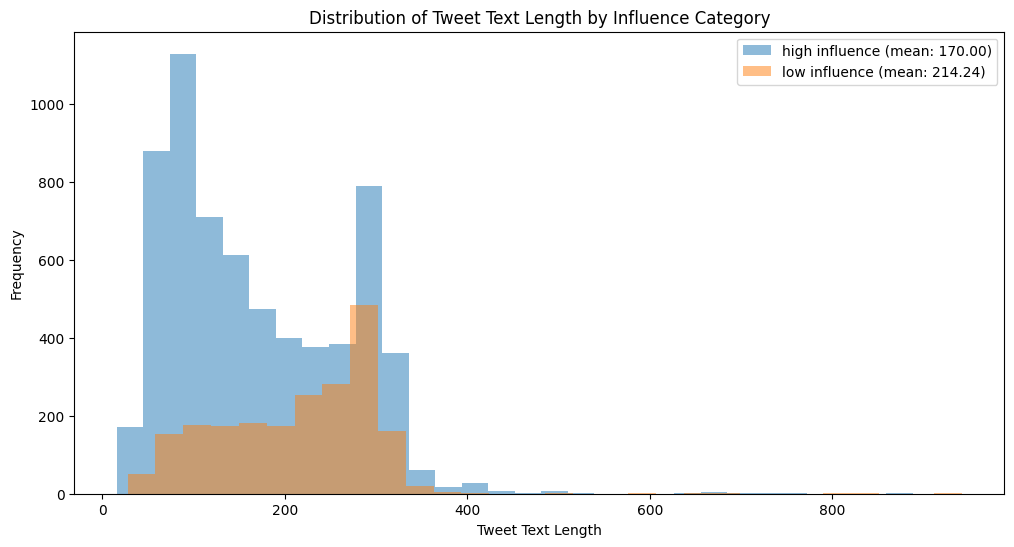

Text Length Statistics:
high influence Text Length:
 Mean: 170.00
 Median: 148.0
 Standard Deviation: 95.91

low influence Text Length:
 Mean: 214.24
 Median: 230.0
 Standard Deviation: 86.63



In [33]:
import matplotlib.pyplot as plt

# Calculate text length
cleaned_df_infl_label['text_length'] = cleaned_df_infl_label['text_nolf'].str.len()

# Initialize figure for text length histogram
plt.figure(figsize=(12, 6))
length_metrics = {}

# Text Length Analysis
for category in ['high influence', 'low influence']:
    text_length_subset = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == category]
    plt.hist(text_length_subset['text_length'], bins=30, alpha=0.5, label=f"{category} (mean: {text_length_subset['text_length'].mean():.2f})")
    length_metrics[category] = {
        'mean': text_length_subset['text_length'].mean(),
        'median': text_length_subset['text_length'].median(),
        'std_dev': text_length_subset['text_length'].std()
    }

# Set titles and labels for text length histogram
plt.title('Distribution of Tweet Text Length by Influence Category')
plt.xlabel('Tweet Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print text length metrics
print("Text Length Statistics:")
for category, values in length_metrics.items():
    print(f"{category} Text Length:")
    print(f" Mean: {values['mean']:.2f}")
    print(f" Median: {values['median']}")
    print(f" Standard Deviation: {values['std_dev']:.2f}\n")




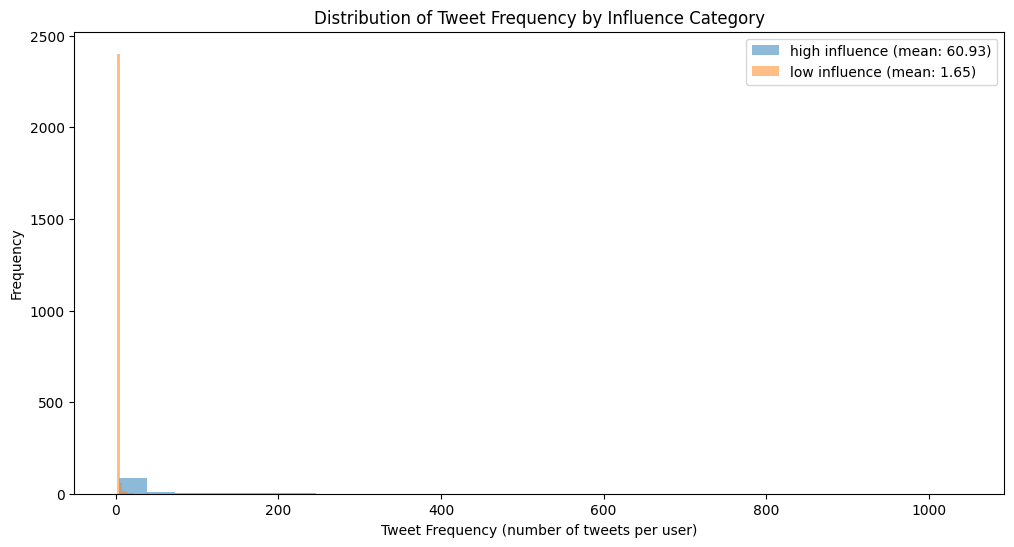

Tweet Frequency Statistics:
high influence Tweet Frequency:
 Mean: 60.93
 Median: 10.0
 Standard Deviation: 150.08

low influence Tweet Frequency:
 Mean: 1.65
 Median: 1.0
 Standard Deviation: 3.89



In [34]:
# Calculate frequency of tweets per user per category
tweet_freq = cleaned_df_infl_label.groupby(['author', 'influence_category']).size().reset_index(name='tweet_count')

# Initialize figure for tweet frequency histogram
plt.figure(figsize=(12, 6))
freq_metrics = {}

# Tweet Frequency Analysis
for category in ['high influence', 'low influence']:
    freq_subset = tweet_freq[tweet_freq['influence_category'] == category]
    plt.hist(freq_subset['tweet_count'], bins=30, alpha=0.5, label=f"{category} (mean: {freq_subset['tweet_count'].mean():.2f})")
    freq_metrics[category] = {
        'mean': freq_subset['tweet_count'].mean(),
        'median': freq_subset['tweet_count'].median(),
        'std_dev': freq_subset['tweet_count'].std()
    }

# Set titles and labels for tweet frequency histogram
plt.title('Distribution of Tweet Frequency by Influence Category')
plt.xlabel('Tweet Frequency (number of tweets per user)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print tweet frequency metrics
print("Tweet Frequency Statistics:")
for category, values in freq_metrics.items():
    print(f"{category} Tweet Frequency:")
    print(f" Mean: {values['mean']:.2f}")
    print(f" Median: {values['median']}")
    print(f" Standard Deviation: {values['std_dev']:.2f}\n")


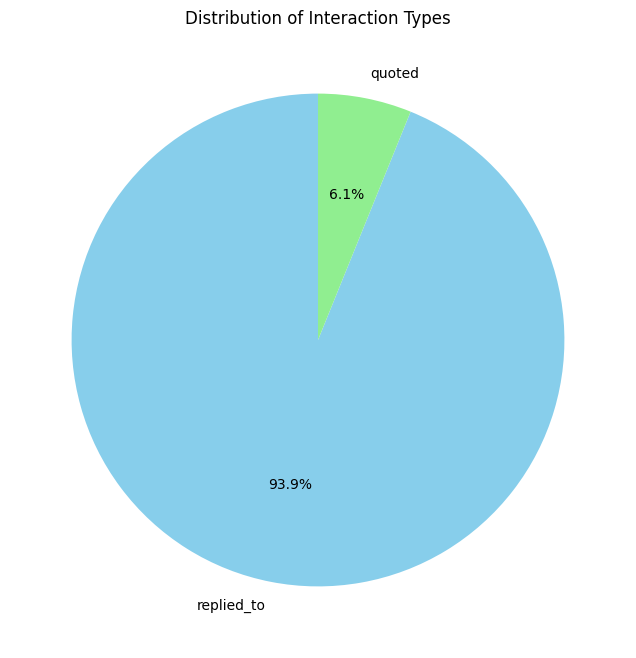

In [35]:
interaction_counts = cleaned_df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
interaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Distribution of Interaction Types')
plt.ylabel('')
plt.show()


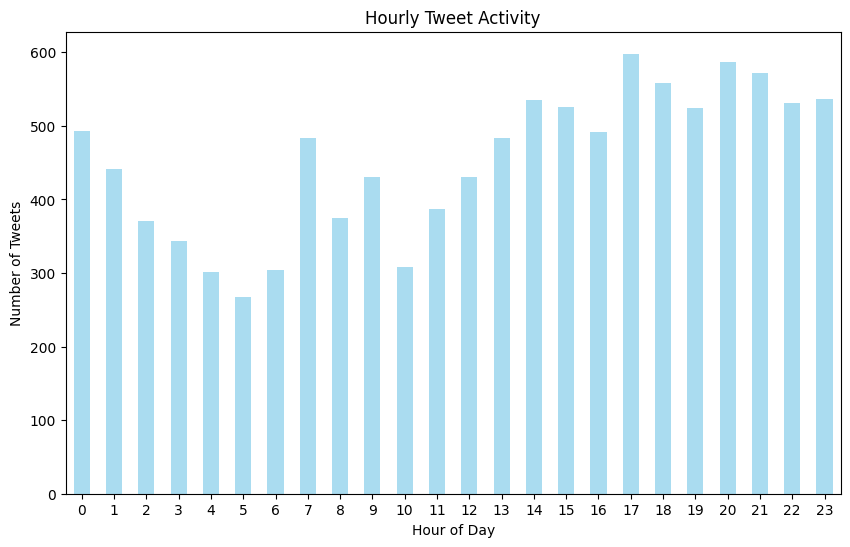

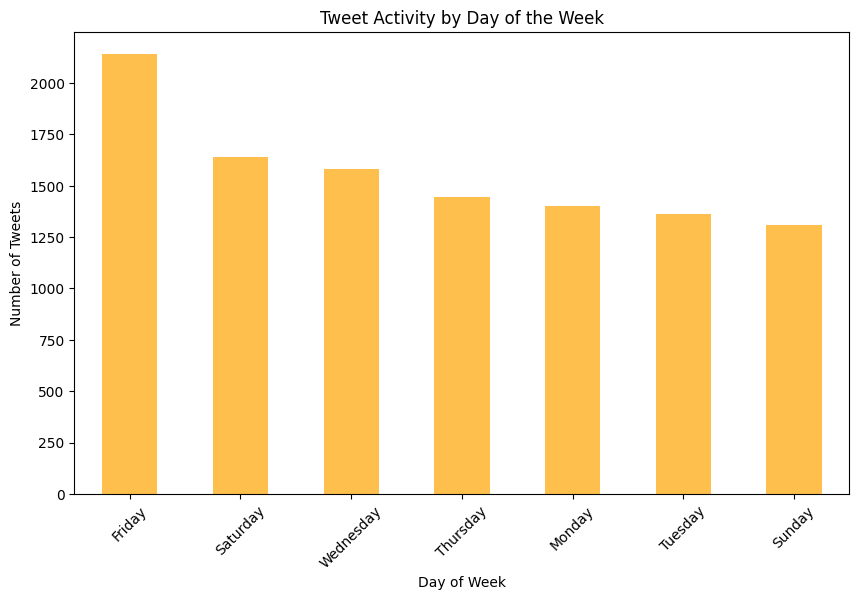

In [36]:
# Extract hour and day of the week
cleaned_df_infl_label['hour'] = pd.to_datetime(cleaned_df_infl_label['date']).dt.hour
cleaned_df_infl_label['day_of_week'] = pd.to_datetime(cleaned_df_infl_label['date']).dt.day_name()

hourly_activity = cleaned_df_infl_label['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Hourly Tweet Activity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

weekday_activity = cleaned_df_infl_label['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
weekday_activity.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Tweet Activity by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


In [37]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 7.9 MB/s eta 0:00:00


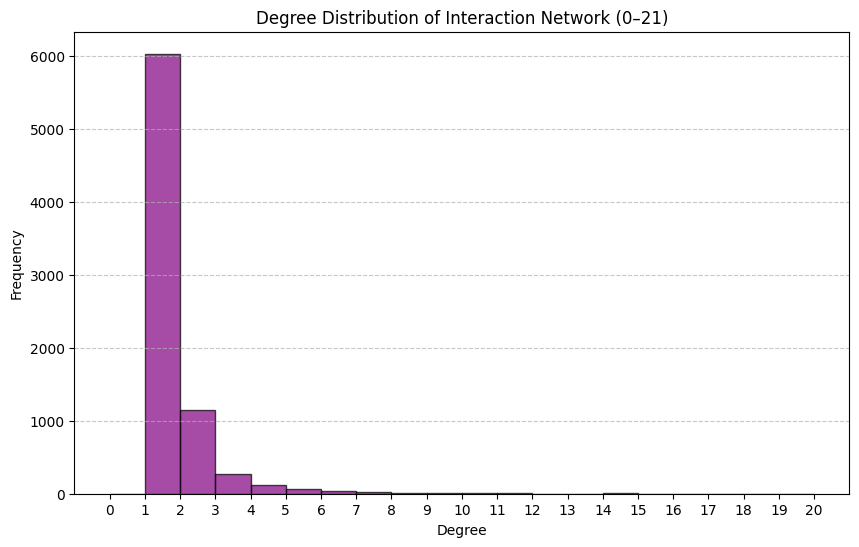

Number of Nodes: 7772
Number of Edges: 7588


In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Build a directed graph
G = nx.DiGraph()
edges = cleaned_df[['author', 'in_reply_to_user_id']].dropna()
G.add_edges_from(edges.itertuples(index=False, name=None))

degree_distribution = [d for n, d in G.degree() if d <= 21]

bins = list(range(0, 21))

plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=bins, alpha=0.7, color='purple', edgecolor='black')
plt.title('Degree Distribution of Interaction Network (0–21)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print graph statistics
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_matrix = vectorizer.fit_transform(cleaned_df_infl_label['text_nolf'].dropna())

# Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(text_matrix)

# Display topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic 1:
putinhitler standwithukraine https stopputinnow russiasanctions boycottrussia bot putinwarcriminal genocide home

Topic 2:
amp ford time abuse violence vote https doug need racism

Topic 3:
good just fbpe followbackfriday followed hope morning hi jacquesrogues lovely

Topic 4:
conservative amp like https ford nevervoteconservative cdnpoli canada people ontario

Topic 5:
https amp traitor j6 tell israel apartheid says israeli support

Topic 6:
https know government use legal week south ableg new school

Topic 7:
https amp canada trudeau ottawa canadians like omicron antisemitism ba2

Topic 8:
https ukraine russia putin russian people trump ukraineinvasion war military

Topic 9:
amp covid19 covid https longcovid bcpoli people omicron virus health

Topic 10:
https amp ottawa police canada don like way women say



In [40]:
import re

# Drop missing text
cleaned_df_infl_label = cleaned_df_infl_label.dropna(subset=['text_nolf'])

# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    return text.lower().strip()  # Convert to lowercase and strip spaces

# Apply cleaning
cleaned_df_infl_label['cleaned_text'] = cleaned_df_infl_label['text_nolf'].apply(clean_text)


<ipython-input-40-0cbef578b549>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_infl_label['cleaned_text'] = cleaned_df_infl_label['text_nolf'].apply(clean_text)


<ipython-input-41-126e30eba5c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_infl_label['text_length'] = cleaned_df_infl_label['cleaned_text'].str.len()


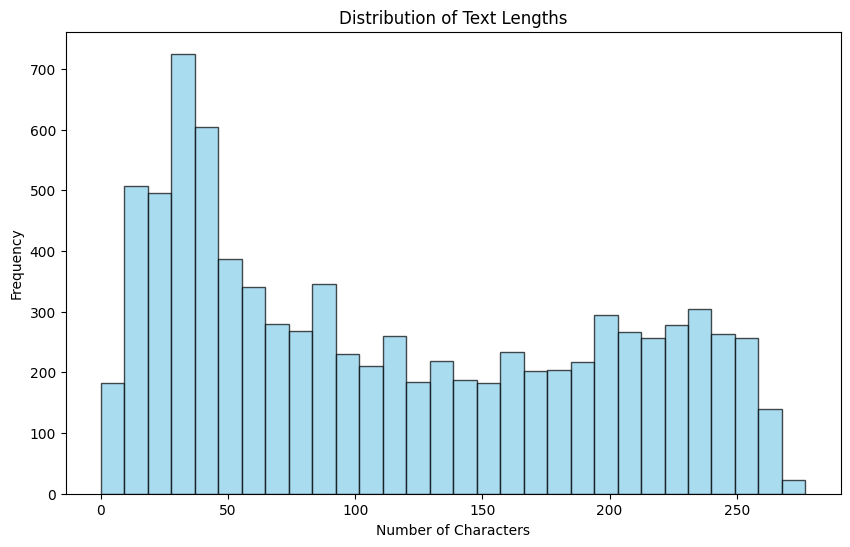


Text Length Statistics:
count   8546
mean     115
std       80
min        0
25%       40
50%       98
75%      191
max      277
Name: text_length, dtype: float64


In [41]:
# Calculate text lengths
cleaned_df_infl_label['text_length'] = cleaned_df_infl_label['cleaned_text'].str.len()

# Plot distribution of text lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(cleaned_df_infl_label['text_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Print basic statistics
print("\nText Length Statistics:")
print(cleaned_df_infl_label['text_length'].describe())



Most Common Non-Stop Words:
[('amp', 1543), ('just', 1179), ('good', 1030), ('followed', 794), ('people', 568), ('like', 393), ('time', 351), ('hope', 344), ('need', 330), ('covid', 325), ('ford', 311), ('dont', 303), ('know', 256), ('youre', 221), ('public', 218), ('canada', 212), ('bot', 209), ('doug', 195), ('im', 193), ('stop', 185)]


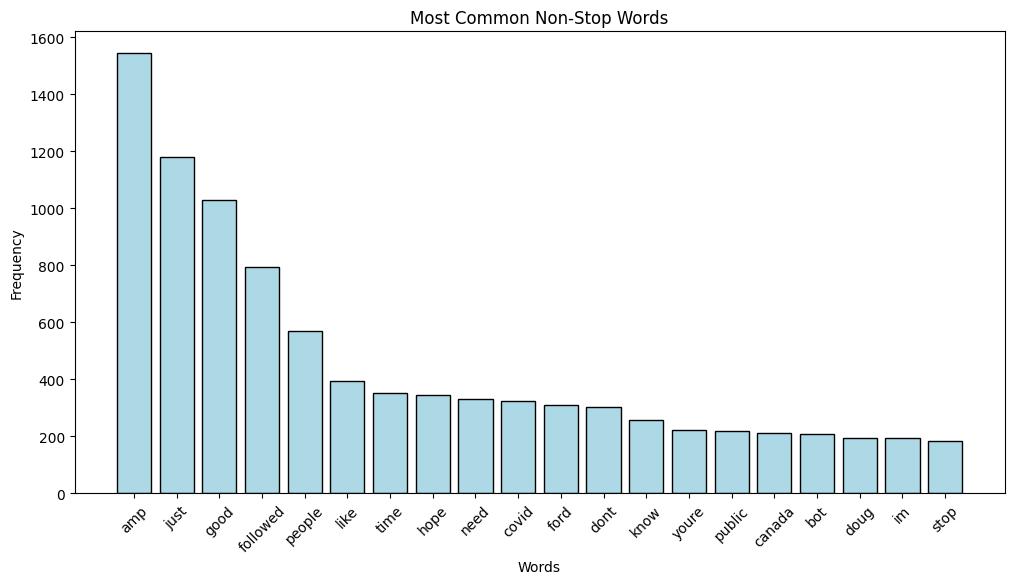

In [42]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Tokenize text into words
word_list = cleaned_df_infl_label['cleaned_text'].str.split().explode()

# Filter out stop words
filtered_words = word_list[~word_list.isin(ENGLISH_STOP_WORDS)]

# Count word frequencies
word_freq = Counter(filtered_words)

# Most common non-stop words
common_words = word_freq.most_common(20)
print("\nMost Common Non-Stop Words:")
print(common_words)

# Plot word frequencies
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='lightblue', edgecolor='black')
plt.title('Most Common Non-Stop Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


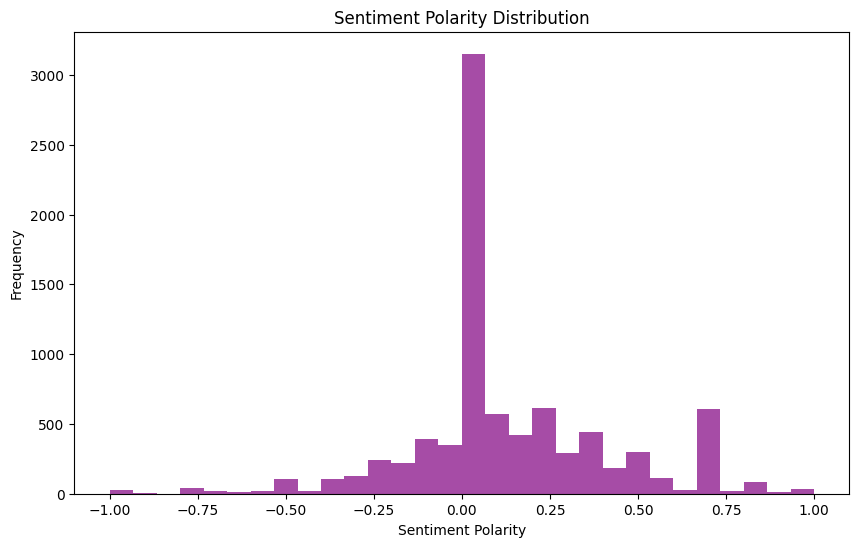

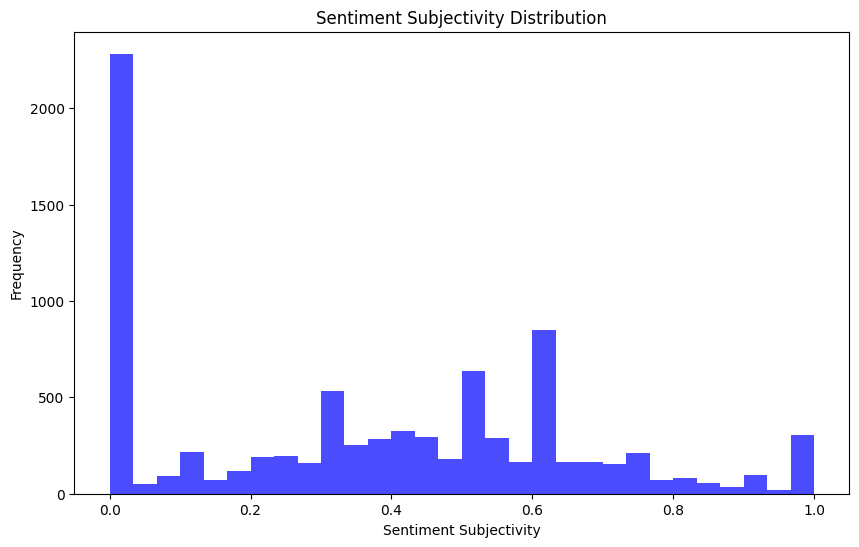


Sentiment Polarity Statistics:
count   8546
mean       0
std        0
min       -1
25%        0
50%        0
75%        0
max        1
Name: sentiment_polarity, dtype: float64

Sentiment Subjectivity Statistics:
count   8546
mean       0
std        0
min        0
25%        0
50%        0
75%        1
max        1
Name: sentiment_subjectivity, dtype: float64

Most Common Words:
the: 6696
to: 4878
a: 4179
of: 3241
and: 2883
is: 2858
in: 2721
for: 2013
you: 1821
have: 1641


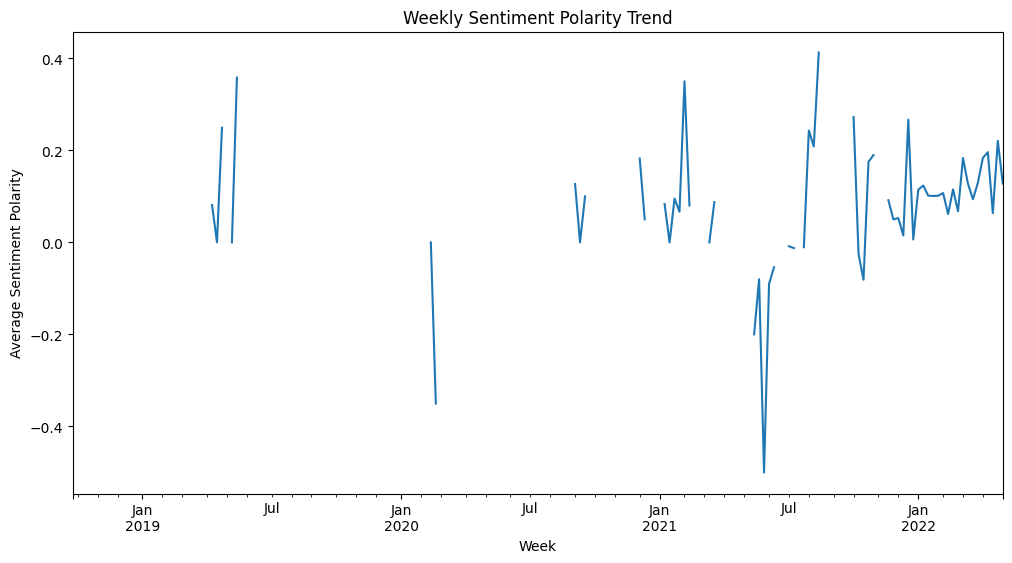

In [43]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

# Assuming 'cleaned_df_infl_label' is already loaded and 'cleaned_text' is prepared

# Compute initial sentiment polarity
cleaned_df_infl_label['sentiment_polarity'] = cleaned_df_infl_label['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Compute sentiment subjectivity
cleaned_df_infl_label['sentiment_subjectivity'] = cleaned_df_infl_label['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df_infl_label['sentiment_polarity'], bins=30, color='purple', alpha=0.7)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot sentiment subjectivity distribution
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df_infl_label['sentiment_subjectivity'], bins=30, color='blue', alpha=0.7)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Print sentiment statistics
print("\nSentiment Polarity Statistics:")
print(cleaned_df_infl_label['sentiment_polarity'].describe())

print("\nSentiment Subjectivity Statistics:")
print(cleaned_df_infl_label['sentiment_subjectivity'].describe())

# Common words extraction
from collections import Counter
words = Counter(" ".join(cleaned_df_infl_label["cleaned_text"]).split()).most_common(10)
print("\nMost Common Words:")
for word, frequency in words:
    print(f"{word}: {frequency}")

# Sentiment trend over time (assuming a 'date' column exists and is formatted properly)
cleaned_df_infl_label['date'] = pd.to_datetime(cleaned_df_infl_label['date'])
sentiment_over_time = cleaned_df_infl_label.resample('W', on='date')['sentiment_polarity'].mean()  # Weekly average

plt.figure(figsize=(12, 6))
sentiment_over_time.plot()
plt.title('Weekly Sentiment Polarity Trend')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Polarity')
plt.show()

# Group sentiments by topics or categories (assuming topics or categories already extracted)
# Here, replace 'topic_label' with your actual topic/category column
if 'topic_label' in cleaned_df_infl_label.columns:
    sentiment_by_topic = cleaned_df_infl_label.groupby('topic_label')['sentiment_polarity'].mean()
    plt.figure(figsize=(10, 6))
    sentiment_by_topic.plot(kind='bar', color='green')
    plt.title('Average Sentiment Polarity by Topic')
    plt.xlabel('Topic')
    plt.ylabel('Average Sentiment Polarity')
    plt.xticks(rotation=45)
    plt.show()


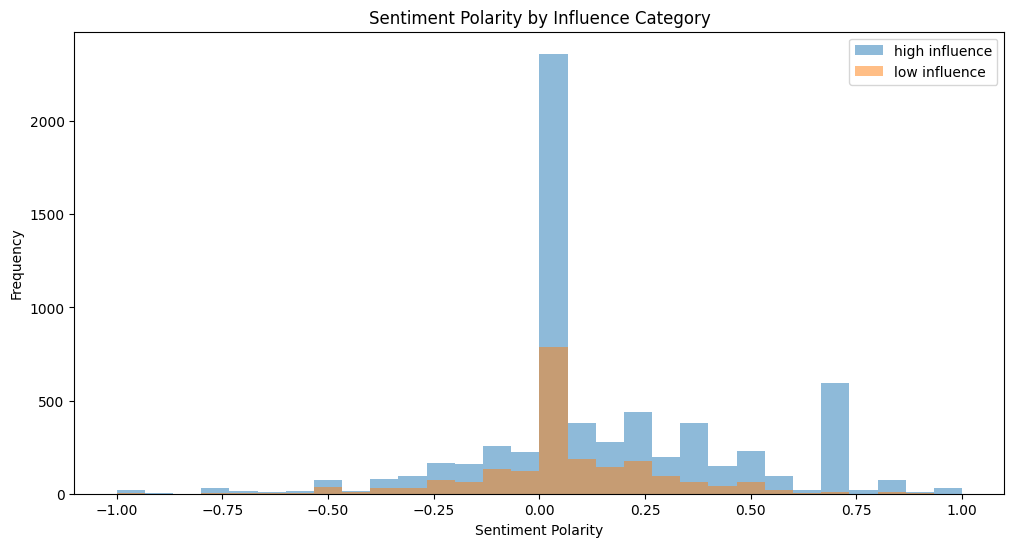

In [44]:
plt.figure(figsize=(12, 6))
for category in ['high influence', 'low influence']:
    subset = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == category]
    plt.hist(subset['sentiment_polarity'], bins=30, alpha=0.5, label=category)

plt.title('Sentiment Polarity by Influence Category')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


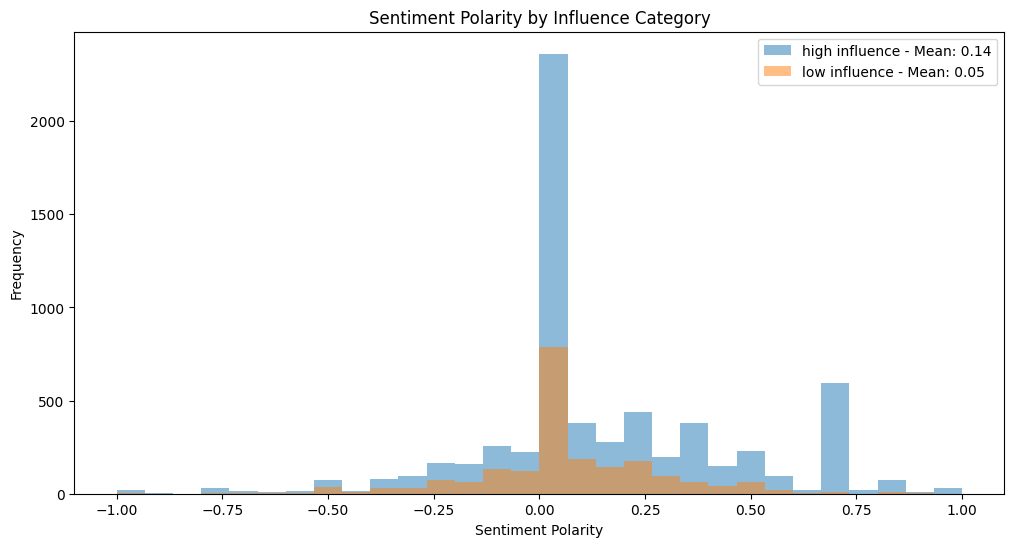


high influence Sentiment Analysis Metrics:
Mean Polarity: 0.1375
Median Polarity: 0.0000
Standard Deviation of Polarity: 0.3079
Proportion of Positive Sentiments: 0.4884
Proportion of Neutral Sentiments: 0.3305
Proportion of Negative Sentiments: 0.1811

low influence Sentiment Analysis Metrics:
Mean Polarity: 0.0550
Median Polarity: 0.0000
Standard Deviation of Polarity: 0.2255
Proportion of Positive Sentiments: 0.4513
Proportion of Neutral Sentiments: 0.3059
Proportion of Negative Sentiments: 0.2428


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate additional sentiment metrics for each influence category
sentiment_metrics = {}

for category in ['high influence', 'low influence']:
    subset = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == category]

    # Calculating various statistics
    mean_polarity = subset['sentiment_polarity'].mean()
    median_polarity = subset['sentiment_polarity'].median()
    std_dev_polarity = subset['sentiment_polarity'].std()
    positive_sentiment_proportion = (subset['sentiment_polarity'] > 0).mean()
    neutral_sentiment_proportion = (subset['sentiment_polarity'] == 0).mean()
    negative_sentiment_proportion = (subset['sentiment_polarity'] < 0).mean()

    # Storing metrics in a dictionary
    sentiment_metrics[category] = {
        'Mean Polarity': mean_polarity,
        'Median Polarity': median_polarity,
        'Standard Deviation of Polarity': std_dev_polarity,
        'Proportion of Positive Sentiments': positive_sentiment_proportion,
        'Proportion of Neutral Sentiments': neutral_sentiment_proportion,
        'Proportion of Negative Sentiments': negative_sentiment_proportion
    }

# Plot sentiment polarity distribution
plt.figure(figsize=(12, 6))
for category in ['high influence', 'low influence']:
    subset = cleaned_df_infl_label[cleaned_df_infl_label['influence_category'] == category]
    plt.hist(subset['sentiment_polarity'], bins=30, alpha=0.5, label=f"{category} - Mean: {sentiment_metrics[category]['Mean Polarity']:.2f}")
plt.title('Sentiment Polarity by Influence Category')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print detailed sentiment statistics
for category, metrics in sentiment_metrics.items():
    print(f"\n{category} Sentiment Analysis Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")


In [46]:
# Outliers: Extremely positive or negative sentiment
outliers = cleaned_df_infl_label[(cleaned_df_infl_label['sentiment_polarity'] > 0.9) | (cleaned_df_infl_label['sentiment_polarity'] < -0.9)]
print("\nSample Outliers in Sentiment:")
print(outliers[['cleaned_text', 'sentiment_polarity']].head(10))



Sample Outliers in Sentiment:
                                           cleaned_text  sentiment_polarity
155                                         truly awful                  -1
241            sue was the perfect host for the evening                   1
530                wonderful hope you had a fab time at                   1
766   the greatest of respect for the queen demonstr...                   1
804                         it was awful of  to do that                  -1
1075                                      thats awesome                   1
1092  just followed everyone tagged in this thread  ...                   1
1124                          omgthat would be terrible                  -1
1130  trump has an advertisement before your video d...                  -1
1162  and prosperous to the  inc   very proud i got ...                   1


Testing it out based on tweet text data

```
# This is formatted as code
```



# Graph Construction and Statistics

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

df = cleaned_df_infl_label

G = nx.DiGraph()

df_edges = df[['author', 'in_reply_to_user_id']].dropna()
df_edges['author'] = df_edges['author'].astype(int)
df_edges['in_reply_to_user_id'] = df_edges['in_reply_to_user_id'].astype(int)
G.add_edges_from(df_edges[['author', 'in_reply_to_user_id']].values)

# Compute statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [d for n, d in G.degree()]
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

# Compute assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print(f'Degree Assortativity Coefficient: {assortativity}')


Number of nodes: 6177
Number of edges: 6116
Degree Assortativity Coefficient: -0.2269371217779943


In [48]:
!pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=2c8c2fa74c9d067c5f3c6d9e2f91cd068e0c4879a8b27bea3711ae5e57204828
  Stored in directory: /root/.cache/pip/wheels/d0/b0/d7/6dd26c3817810fa379088eaeb755a01d9a2a411c37632079d1
Successfully built python-louvain


# Community Detection and Impact Analysis


In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community.community_louvain as community_louvain
import random

# Perform community detection
partition = community_louvain.best_partition(G.to_undirected())
nx.set_node_attributes(G, partition, 'community')

# Number of communities
num_communities = len(set(partition.values()))
print(f'Number of communities detected: {num_communities}')

# Remove a random community and analyze impact
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

random_comm_id = random.choice(list(communities.keys()))
nodes_to_remove = communities[random_comm_id]
G_removed = G.copy()
G_removed.remove_nodes_from(nodes_to_remove)

num_nodes_removed = G_removed.number_of_nodes()
num_edges_removed = G_removed.number_of_edges()
print(f'After removing community {random_comm_id}:')
print(f'Number of nodes: {num_nodes_removed}')
print(f'Number of edges: {num_edges_removed}')

Number of communities detected: 890
After removing community 373:
Number of nodes: 6176
Number of edges: 6115
